In [1]:
import pandas as pd

df_jugadores = pd.read_csv("../jugadores_cebollitas.csv")
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


In [2]:
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X)

In [4]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
clusters_profiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(clusters_profiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


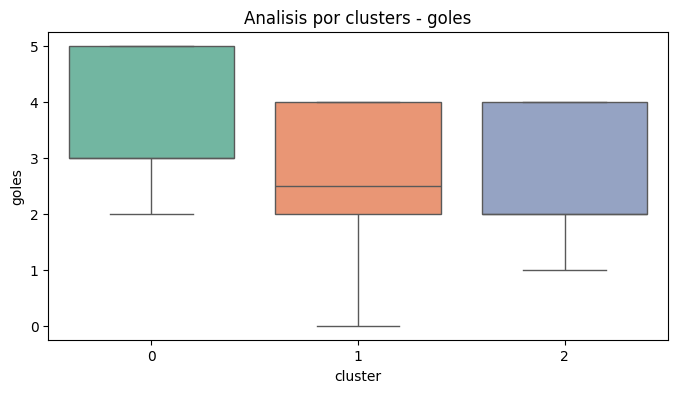

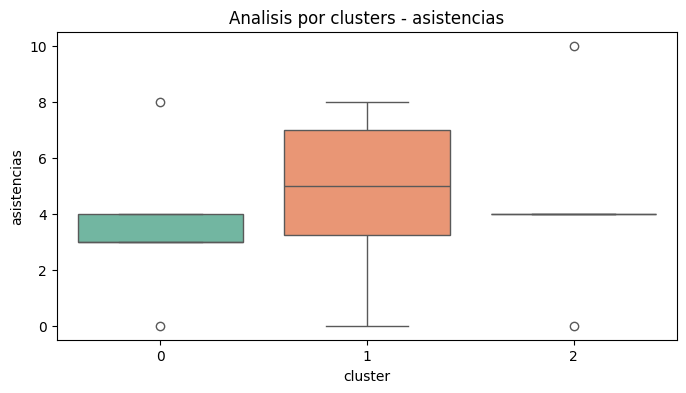

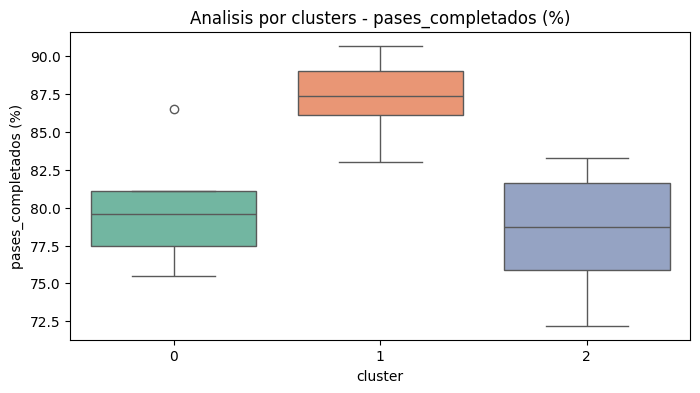

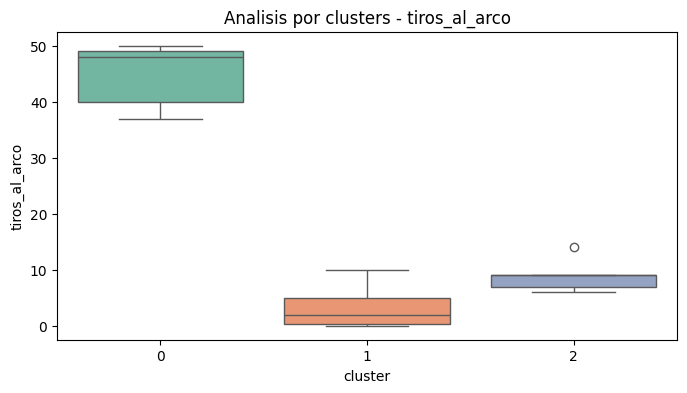

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2', legend=False, hue='cluster')
    plt.title(f'Analisis por clusters - {feature}')
    plt.show()

In [10]:
import ipywidgets as widgets
from IPython.display import display

# Dropdown para seleccionar el cluster
cluster_selector = widgets.Dropdown(
    options=df_jugadores['cluster'].unique(),
    description='Cluster:'
)

# Función de despliegue
def mostrar_jugadores(cluster):
    jugadores = df_jugadores[df_jugadores['cluster'] == cluster]
    display(jugadores[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

widgets.interactive(mostrar_jugadores, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(1), np.int32(0), np.int32(2)), value=…